In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data)
trial_data_df = pd.read_csv(clinical_trial_data)



In [2]:
# Combine the data into a single dataset
merged_df = pd.merge(trial_data_df, mouse_data_df, on='Mouse ID', how='left')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_grouped = merged_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']

mean_tumor = tumor_grouped.mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor)

# Preview DataFrame
mean_tumor_df = mean_tumor_df.reset_index()
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = tumor_grouped.sem()

# Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_sem)

# Preview DataFrame
tumor_sem_df = tumor_sem_df.reset_index()
tumor_sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
data_munging_tumor_df = mean_tumor_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
data_munging_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


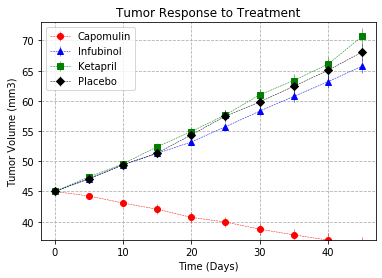

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)

error = tumor_sem["Capomulin"]
cap = plt.errorbar(data_munging_tumor_df.index, data_munging_tumor_df["Capomulin"], yerr=error, fmt="o", color="red", ls="dashed", linewidth=.5)

error = tumor_sem["Infubinol"]
infu = plt.errorbar(data_munging_tumor_df.index, data_munging_tumor_df["Infubinol"], yerr=error, fmt="^", color="blue", ls="dashed", linewidth=.5)

error = tumor_sem["Ketapril"]
keta = plt.errorbar(data_munging_tumor_df.index, data_munging_tumor_df["Ketapril"], yerr=error, fmt="s", color="green", ls="dashed", linewidth=.5)

error = tumor_sem["Placebo"]
plac = plt.errorbar(data_munging_tumor_df.index, data_munging_tumor_df["Placebo"], yerr=error, fmt="D", color="black", ls="dashed", linewidth=.5)

plt.ylim(37, 73)
plt.xlim(-2, 47)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.show()

# Save the Figure
plt.savefig("./figures/tumor_response_to_treatment.png")


In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met = merged_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_met = grouped_met.mean()

# Convert to DataFrame
avg_met_df = pd.DataFrame(avg_met)

# Preview DataFrame
avg_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
met_standard_errors = grouped_met.sem()

# Convert to DataFrame
met_standard_errors_df = pd.DataFrame(met_standard_errors)

# Preview DataFrame
met_standard_errors_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
meta_plot_pre = avg_met_df.unstack(0)
meta_plot_df = meta_plot_pre["Metastatic Sites"]

# Preview that Reformatting worked
meta_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


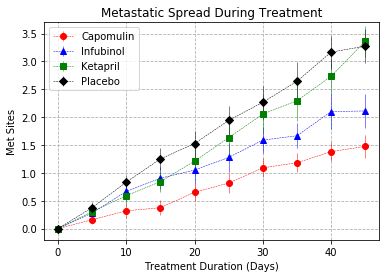

In [11]:
# Generate the Plot (with Error Bars)

error2 = met_standard_errors["Capomulin"]
cap2 = plt.errorbar(meta_plot_df.index, meta_plot_df["Capomulin"], yerr=error2, fmt="o", color="red", ls="dashed", linewidth=.5)

error2 = met_standard_errors["Infubinol"]
infu2 = plt.errorbar(meta_plot_df.index, meta_plot_df["Infubinol"], yerr=error2, fmt="^", color="blue", ls="dashed", linewidth=.5)

error2 = met_standard_errors["Ketapril"]
keta2 = plt.errorbar(meta_plot_df.index, meta_plot_df["Ketapril"], yerr=error2, fmt="s", color="green", ls="dashed", linewidth=.5)

error2 = met_standard_errors["Placebo"]
plac2 = plt.errorbar(meta_plot_df.index, meta_plot_df["Placebo"], yerr=error2, fmt="D", color="black", ls="dashed", linewidth=.5)

plt.ylim(-.2, 3.7)
plt.xlim(-2, 47)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"),loc='best')


# Save the Figure
plt.savefig("./figures/metastatic_spread_during_treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped_df = merged_df.groupby(['Drug','Timepoint'])['Mouse ID']
count_mouse = mouse_grouped_df.nunique()

# Convert to DataFrame
count_mouse_df = pd.DataFrame(count_mouse)

# Preview DataFrame
count_mouse_df = count_mouse_df.reset_index()
count_mouse_df=count_mouse_df.rename(columns={'Mouse ID':'Mouse Count'})
count_mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
data_munging_mouse_df = count_mouse_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
data_munging_mouse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


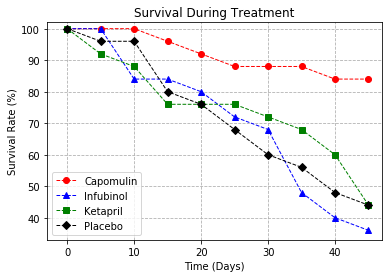

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate the Plot (Accounting for percentages)
cap3 = plt.errorbar(data_munging_mouse_df.index, (data_munging_mouse_df["Capomulin"]/25*100), fmt="o", ls="dashed", color="red", linewidth=1)
infu3 = plt.errorbar(data_munging_mouse_df.index, (data_munging_mouse_df["Infubinol"]/25*100), fmt="^", ls="dashed", color="blue", linewidth=1)
keta3 = plt.errorbar(data_munging_mouse_df.index, (data_munging_mouse_df["Ketapril"]/25*100),  fmt="s", ls="dashed", color="green", linewidth=1)
plac3 = plt.errorbar(data_munging_mouse_df.index, (data_munging_mouse_df["Placebo"]/25*100),  fmt="D", ls="dashed", color="black", linewidth=1)

plt.ylim(33, 102)
plt.xlim(-3, 47)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.show()

# Save the Figure
plt.savefig("./figures/survival_during_treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
percentage_change = (data_munging_tumor_df.iloc[-1]/(data_munging_tumor_df.iloc[0])-1)*100

# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

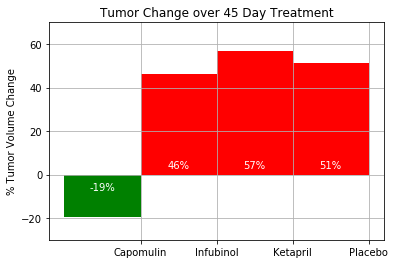

In [17]:
# Store all Relevant Percent Changes into a Tuple
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']

# Splice the data between passing and failing drugs
passing = percentage_change < 0

# Orient widths. Add labels, tick marks, etc. 
change_list = [(percentage_change[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig("./figures/tumor_change_over_45_day_treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)